# **La bagarre**

---



## Preamble

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

### Global variables

In [6]:
batch_size = 512
data_path = './data'
input_shape = (224,224,3)
num_classes = 6

### Imports

In [1]:
import os
import numpy as np
import cv2
import PIL

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetMobile
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import inspect
from tqdm import tqdm

### Functions

In [4]:
def random_images(n):
    images = []
    i = 1
    for dirname, _, filenames in os.walk(data_path):
        for filename in filenames:
            images.append(os.path.join(dirname, filename))
    samples = np.random.randint(len(filenames), size=n)
    print(f'Displaying {n} images from a total of {len(images)} found.')
    f = plt.figure(figsize=(2*n,15))
    for sample in samples:
        sample_image = cv2.imread(images[sample])
        f.add_subplot(1, n, i)
        plt.imshow(sample_image)
        i = i + 1

## Data

Displaying 8 images from a total of 94341 found.


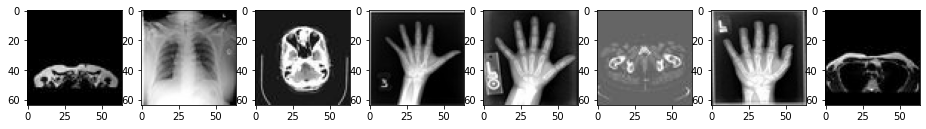

In [7]:
random_images(8)

In [8]:
idg = ImageDataGenerator(rescale=1./255)


train = idg.flow_from_directory(f'{data_path}/processed/train',
                                subset='training',
                                target_size=(224, 224),
                                class_mode="categorical",
                                batch_size=batch_size,
                                shuffle=False,
                                seed=42)

Found 37734 images belonging to 6 classes.


## Evaluate Model

In [ ]:
model = tf.keras.models.load_model('./model/NASNetMobile-mednist')

In [9]:
y_pred = model.predict(train)
y_pred = np.argmax(y_pred, axis=1)

Metal device set to: Apple M1


2022-03-29 12:18:00.888770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-29 12:18:00.889415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-29 12:18:16.780432: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-29 12:18:17.646645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [10]:
print('Confusion Matrix')
print(confusion_matrix(train.classes, y_pred))

Confusion Matrix
[[6388    0    0   12    0    0]
 [   0 5730    0    0    0    0]
 [   0    0 6400    0    0    0]
 [   0    0    0 6400    0    0]
 [   0    0    0    0 6400    0]
 [   1    0    0    0    0 6403]]


In [12]:
print('Classification Report')
print(classification_report(train.classes, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6400
           1       1.00      1.00      1.00      5730
           2       1.00      1.00      1.00      6400
           3       1.00      1.00      1.00      6400
           4       1.00      1.00      1.00      6400
           5       1.00      1.00      1.00      6404

    accuracy                           1.00     37734
   macro avg       1.00      1.00      1.00     37734
weighted avg       1.00      1.00      1.00     37734

